In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('datasets/UNSW_NB15_training.csv')
data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [5]:
data.shape

(82332, 41)

In [6]:
#removes any row in the data DataFrame that contains at least one NaN value
data.dropna(inplace=True)

In [7]:
data['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

In [8]:
features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [9]:
features.head(n=49)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


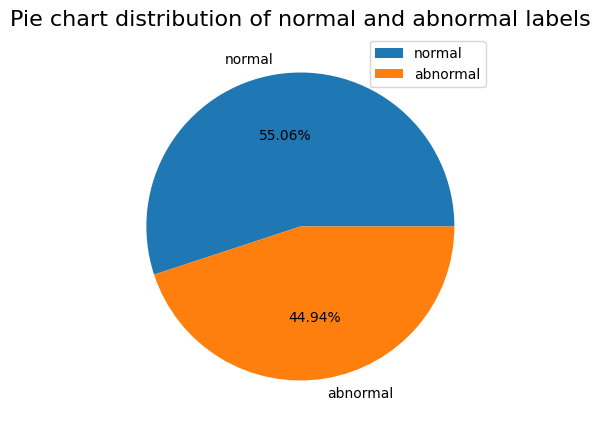

In [10]:
plt.figure(figsize=(5,5))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

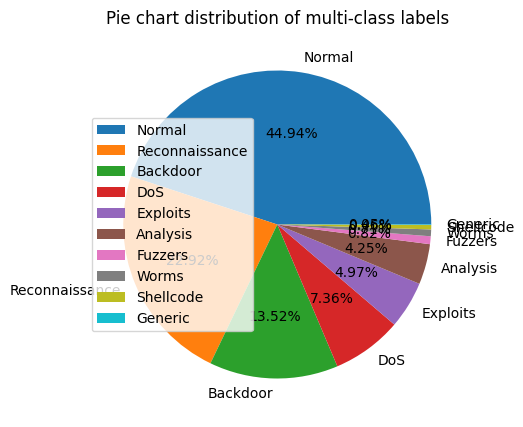

In [11]:
plt.figure(figsize=(5,5))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [12]:
data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


### Data pre-processing

In [13]:
data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [14]:
import warnings
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("datasets/UNSW_NB15_training.csv")

# Define the mapping of attack categories to numerical values
attack_cat_mapping = {
    'Normal': 0,
    'Analysis': 1,
    'Backdoor': 2,
    'DoS': 3,
    'Exploits': 4,
    'Fuzzers': 5,
    'Generic': 6,
    'Reconnaissance': 7,
    'Shellcode': 8,
    'Worms': 9
}

# Replace values in the 'attack_cat' column with numerical values
data['attack_cat'].replace(attack_cat_mapping, inplace=True)

# Define the columns you want to include in the new CSV file
columns_to_include = ['dur','spkts', 'sttl', 'sbytes', 'smean', 'sload', 'ct_dst_sport_ltm', 'attack_cat', 'label']

# Select the specified columns and save them to a new CSV file
data[columns_to_include].to_csv('demo.csv', index=False)


In [15]:
data.iloc[2020:2050]

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
2020,0.000003,2,0,200,0,333333.321500,254,0,2.666667e+08,0.000000,...,1,5,0,0,0,1,5,0,3,1
2021,1.600663,10,8,622,354,10.620599,254,252,2.798840e+03,1549.358032,...,1,2,0,0,0,1,2,0,5,1
2022,0.277875,10,8,910,1640,61.178586,62,252,2.357895e+04,41313.539060,...,1,1,0,0,1,1,1,0,4,1
2023,0.479154,10,6,1270,268,31.305176,254,252,1.908363e+04,3739.925049,...,1,2,0,0,1,1,2,0,5,1
2024,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,...,1,5,0,0,0,1,5,0,3,1
2025,2.007741,10,8,564,354,8.467228,254,252,2.024166e+03,1235.219116,...,1,1,0,0,0,2,2,0,7,1
2026,0.059051,4,2,188,89,84.672572,254,60,1.910213e+04,6096.425293,...,1,1,0,0,0,1,2,0,3,1
2027,0.000008,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,...,1,6,0,0,0,1,6,0,7,1
2028,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,0.000000,...,3,6,0,0,0,5,6,0,4,1
2029,4.406826,64,30,61069,2188,21.103624,62,252,1.091307e+05,3841.313477,...,1,3,0,0,0,1,2,0,4,1


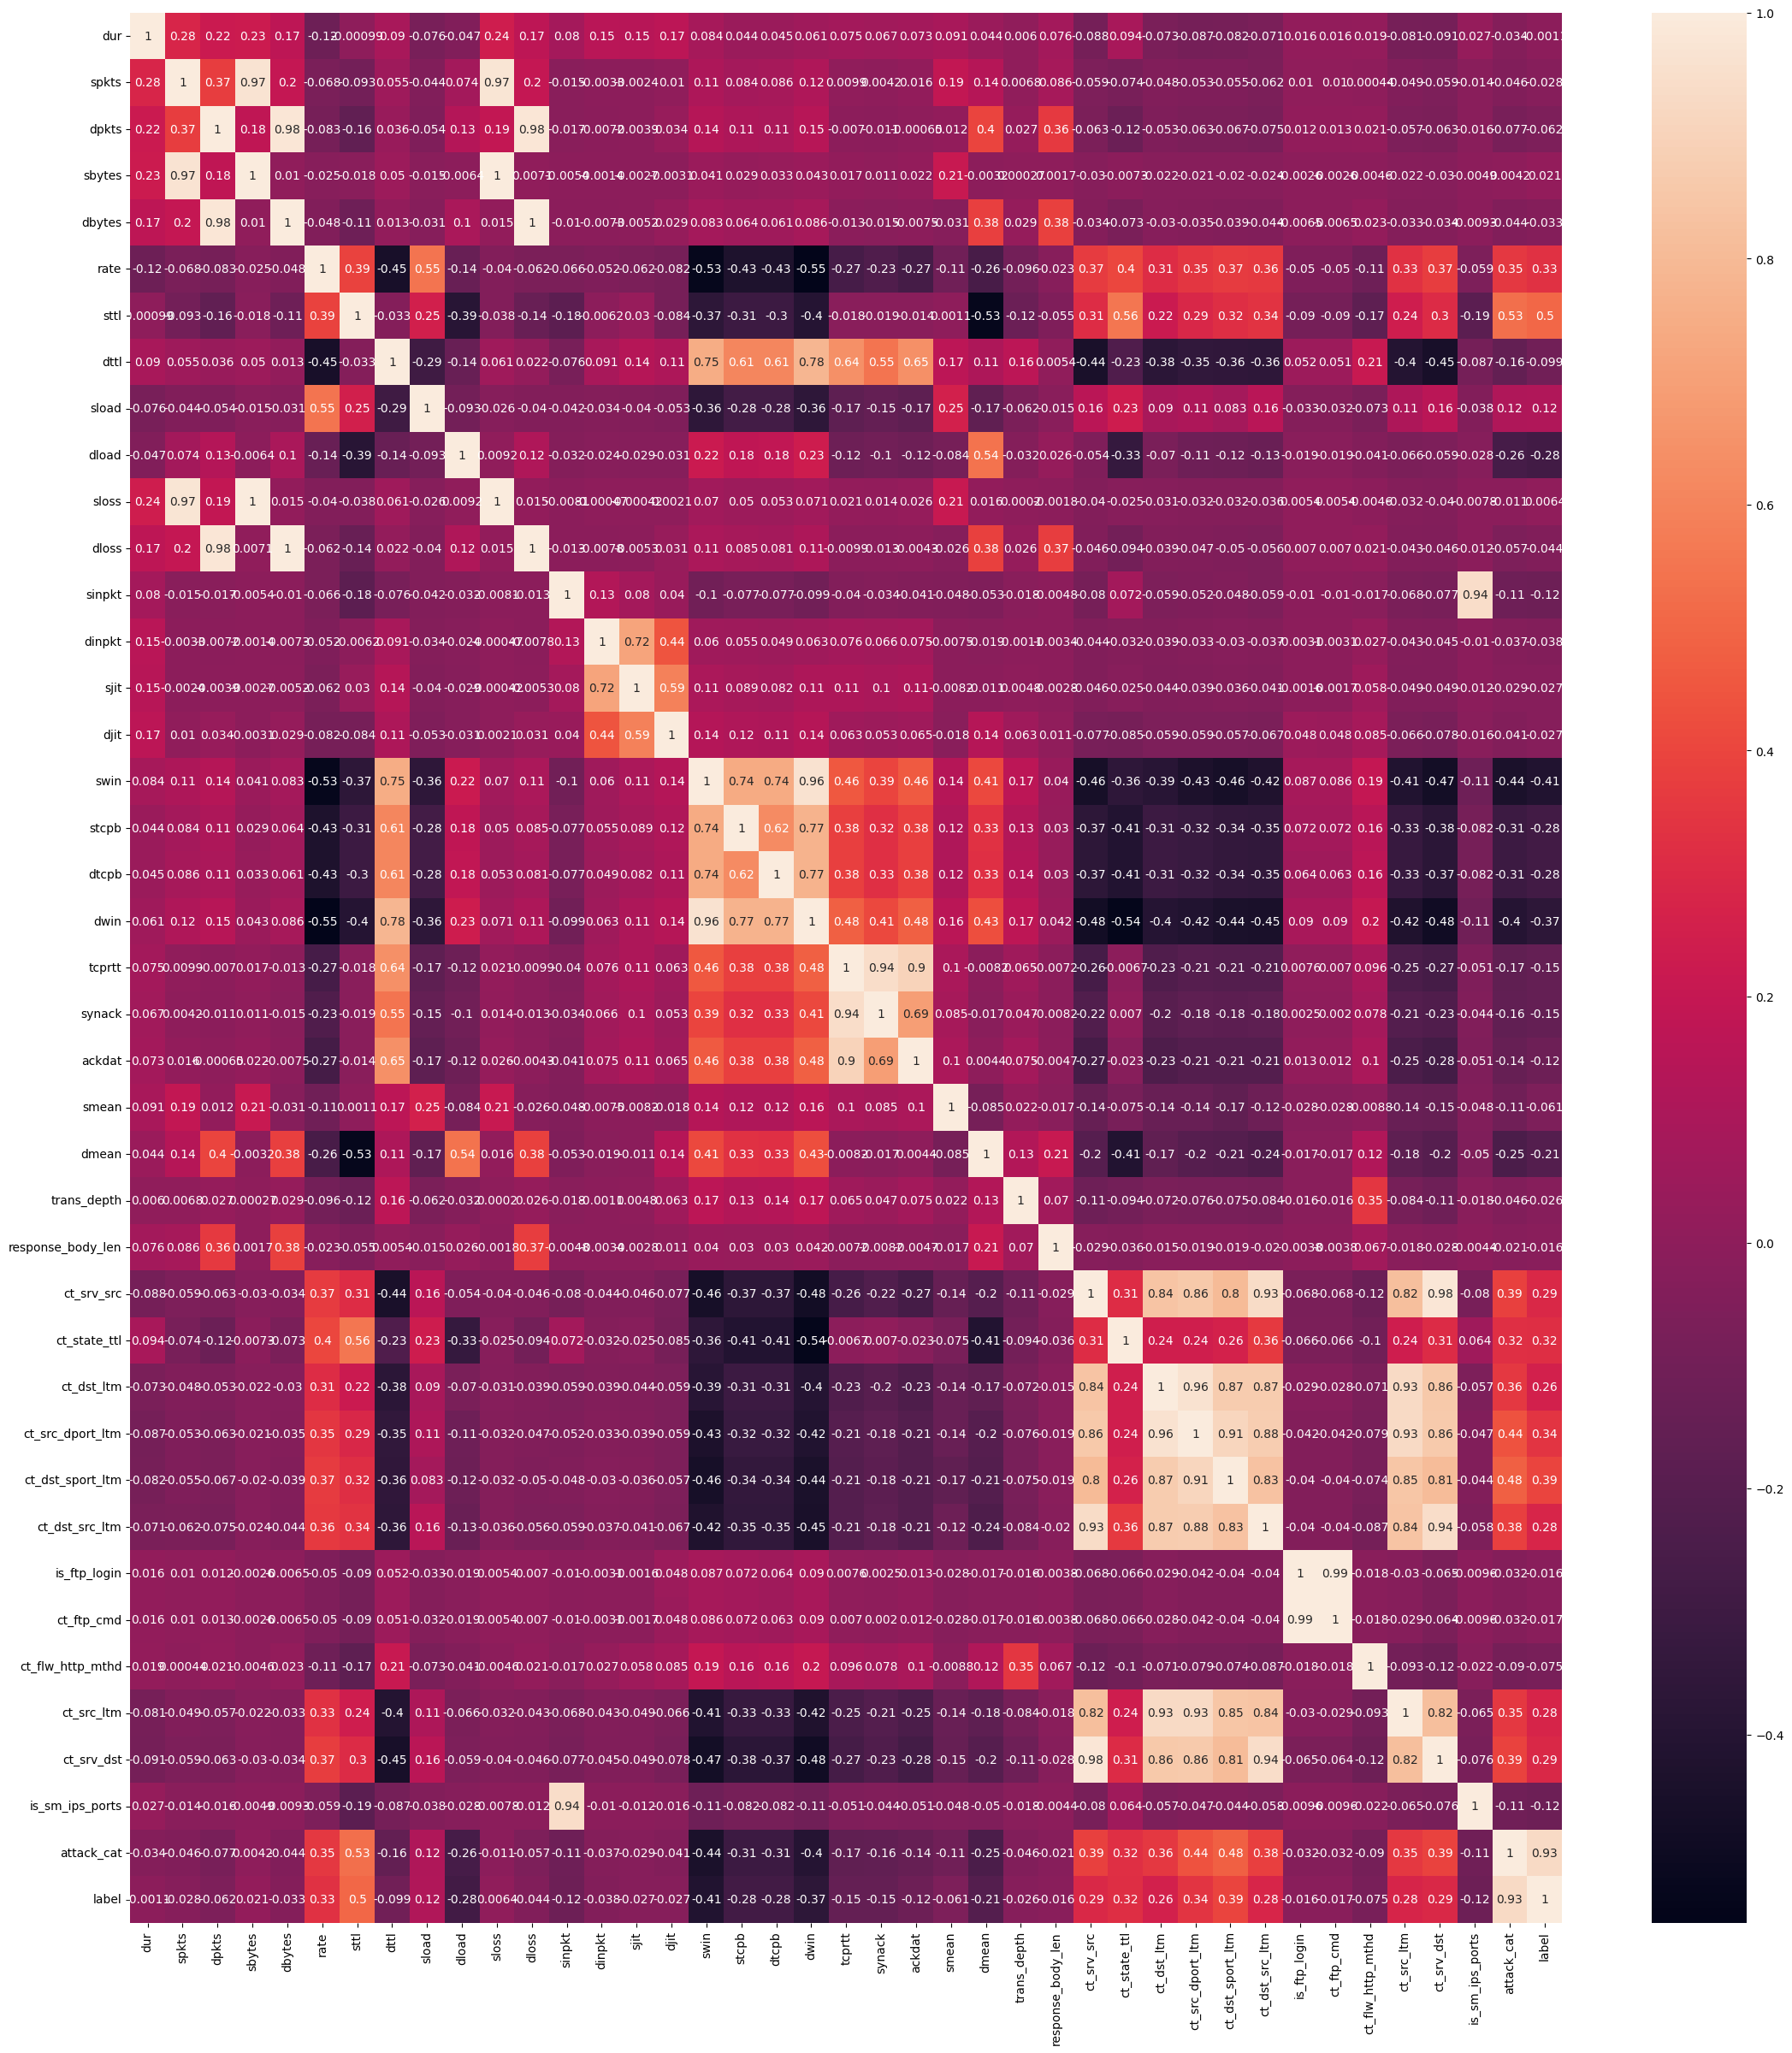

In [16]:
# Heatmap
import seaborn as sns
# Load the dataset

plt.figure(figsize=(27, 29))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [17]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select features with correlation above a certain threshold
threshold = 0.33 # Set your desired threshold here
selected_features = correlation_matrix[abs(correlation_matrix['label']) > threshold].index.tolist()

# Print the selected features
print("Selected highly coorelated are:")
print(selected_features)

Selected highly coorelated are:
['sttl', 'swin', 'dwin', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'attack_cat', 'label']


In [18]:
# Define the columns you want to include in the new CSV file
columns_to_include = ['sttl', 'swin', 'dwin', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'attack_cat', 'label']

data[columns_to_include].to_csv('trial.csv', index=False)

In [24]:
# Define the columns you want to include in the new CSV file
columns_to_include = ['dur', 'spkts', 'sttl', 'sbytes', 'smean', 'sload', 'ct_dst_sport_ltm', 'attack_cat', 'label']

data[columns_to_include].to_csv('train.csv', index=False)

## Model Implementation

In [20]:

import pandas as pd
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv("demo.csv")
X = data.drop('label', axis=1)
Y = data['label']

# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data['label'] )
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (65865, 8)
X_test shape: (16467, 8)
Y_train shape: (65865,)
Y_test shape: (16467,)


In [21]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("demo.csv")
X = data.drop('attack_cat', axis=1)
Y = data['attack_cat']

# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data['attack_cat'] )
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (65865, 8)
X_test shape: (16467, 8)
Y_train shape: (65865,)
Y_test shape: (16467,)


### Binary class

In [23]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)

Time taken to train: 0.05201911926269531 seconds
Mean Absolute Error: 0.12690283558287913
Mean Squared Error: 0.031072158649690863
Root Mean Squared Error: 0.1762729663042262
Accuracy: 87.4479985869009


In [24]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 0.789635181427002 seconds
Mean Absolute Error: 0.2277281836400073
Mean Squared Error: 0.2277281836400073
Root Mean Squared Error: 0.4772087422082786
Accuracy: 77.22718163599927
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      7418
           1       0.75      0.89      0.81      9049

    accuracy                           0.77     16467
   macro avg       0.78      0.76      0.76     16467
weighted avg       0.78      0.77      0.77     16467



In [25]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 0.2399272918701172 seconds
Mean Absolute Error: 0.11738628772696909
Mean Squared Error: 0.11738628772696909
Root Mean Squared Error: 0.3426168234733506
Accuracy: 88.26137122730309
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      7418
           1       0.91      0.87      0.89      9049

    accuracy                           0.88     16467
   macro avg       0.88      0.88      0.88     16467
weighted avg       0.88      0.88      0.88     16467



In [26]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
model = DecisionTreeClassifier()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 0.041190147399902344 seconds
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [27]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier  # Import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Extra Trees model
model = ExtraTreesClassifier()  # Change to ExtraTreesClassifier

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)


Time taken to train: 1.4548804759979248 seconds
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [28]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBoost Classifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model
model = XGBClassifier()  # Change to XGBClassifier

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)


Time taken to train: 0.33956074714660645 seconds
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [29]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Naive Bayes model
model = GaussianNB()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 0.020134925842285156 seconds
Mean Absolute Error: 0.542478897188316
Mean Squared Error: 0.542478897188316
Root Mean Squared Error: 0.7365316674714781
Accuracy: 45.7521102811684
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.99      0.62      7418
           1       0.68      0.02      0.05      9049

    accuracy                           0.46     16467
   macro avg       0.57      0.51      0.33     16467
weighted avg       0.58      0.46      0.31     16467



In [30]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 4.347424030303955 seconds
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       1.00      1.00      1.00      9049

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [31]:
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Generate a simple synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple SVM model with linear kernel
model = SVC(kernel='linear')

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the training time
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_text = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_text)


Time taken to train: 0.06898975372314453 seconds
Mean Absolute Error: 0.13
Mean Squared Error: 0.13
Root Mean Squared Error: 0.36055512754639896
Accuracy: 87.0
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        93
           1       0.92      0.83      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



### Multi-class

In [32]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 4.67841100692749 seconds
Mean Absolute Error: 2.1839436448654888
Mean Squared Error: 8.795226817270905
Root Mean Squared Error: 2.9656747659294846
Accuracy: 36.5518916621121
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18      7418
           1       0.00      0.00      0.00       131
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       786
           4       0.19      0.74      0.30      2275
           5       0.00      0.00      0.00      1212
           6       0.54      0.97      0.70      3723
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.37     16467
   macro avg       0.17      0.18      0.12     16467
weighted avg       0.60      0.37      0.28     16467



In [33]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report)

Time taken to train: 5.3138134479522705 seconds
Mean Absolute Error: 0.19493532519584625
Mean Squared Error: 0.45375599684216916
Root Mean Squared Error: 0.6736141305244191
Accuracy: 88.76540960709298
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       0.08      0.02      0.03       131
           2       0.08      0.01      0.02       117
           3       0.42      0.52      0.47       786
           4       0.69      0.71      0.70      2275
           5       0.70      0.77      0.73      1212
           6       0.99      0.97      0.98      3723
           7       0.91      0.79      0.85       723
           8       0.39      0.35      0.37        75
           9       0.36      0.57      0.44         7

    accuracy                           0.89     16467
   macro avg       0.56      0.57      0.56     16467
weighted avg       0.88      0.89      0.89     16467



In [34]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Naive Bayes model
model = GaussianNB()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_nb = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_nb)


Time taken to train: 0.04645133018493652 seconds
Mean Absolute Error: 2.8302058662780105
Mean Squared Error: 15.379546972733346
Root Mean Squared Error: 3.9216765512639293
Accuracy: 43.91813930892087
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.95      0.61      7418
           1       0.00      0.00      0.00       131
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       786
           4       0.66      0.05      0.09      2275
           5       0.24      0.05      0.08      1212
           6       0.01      0.00      0.00      3723
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.44     16467
   macro avg       0.14      0.10      0.08     16467
weighted avg       0.31      0.44      0.29     16467



In [35]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVC model
model = SVC()

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_svc = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_svc)


Time taken to train: 217.02594900131226 seconds
Mean Absolute Error: 1.494321977287909
Mean Squared Error: 7.133964899495962
Root Mean Squared Error: 2.6709483146433146
Accuracy: 63.02908847999028
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.91      0.76      7418
           1       0.00      0.00      0.00       131
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       786
           4       0.32      0.04      0.07      2275
           5       0.00      0.00      0.00      1212
           6       0.61      0.96      0.74      3723
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.63     16467
   macro avg       0.16      0.19      0.16     16467
weighted avg       0.47      0.63      0.52     16467



In [36]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_dt = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_dt)


Time taken to train: 0.1531658172607422 seconds
Mean Absolute Error: 0.2095099289488067
Mean Squared Error: 0.48363393453573816
Root Mean Squared Error: 0.6954379444175721
Accuracy: 87.88486063035161
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       0.08      0.02      0.03       131
           2       0.13      0.02      0.03       117
           3       0.40      0.54      0.46       786
           4       0.67      0.67      0.67      2275
           5       0.71      0.73      0.72      1212
           6       0.98      0.98      0.98      3723
           7       0.88      0.77      0.82       723
           8       0.31      0.37      0.34        75
           9       0.36      0.57      0.44         7

    accuracy                           0.88     16467
   macro avg       0.55      0.57      0.55     16467
weighted avg       0.88      0.88      0.88     16467



In [37]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Extra Trees model
model = ExtraTreesClassifier(random_state=42)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_et = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_et)


Time taken to train: 4.457470893859863 seconds
Mean Absolute Error: 0.19548187283658225
Mean Squared Error: 0.4527236290763345
Root Mean Squared Error: 0.6728474040050496
Accuracy: 88.66824558207324
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       0.08      0.02      0.03       131
           2       0.07      0.01      0.02       117
           3       0.42      0.53      0.47       786
           4       0.69      0.71      0.70      2275
           5       0.71      0.76      0.74      1212
           6       0.99      0.98      0.98      3723
           7       0.91      0.79      0.84       723
           8       0.38      0.41      0.40        75
           9       0.40      0.57      0.47         7

    accuracy                           0.89     16467
   macro avg       0.57      0.58      0.56     16467
weighted avg       0.88      0.89      0.88     16467



In [38]:
# Import necessary libraries
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('demo.csv')

# Select the features and target variable
X = data.drop('attack_cat', axis=1)
y = data['attack_cat']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model
model = XGBClassifier(random_state=42)

# Start the timer
start_time = time.time()

# Fit the model to the training data
model.fit(X_train, y_train)

# Stop the timer
end_time = time.time()

# Calculate the time taken to train
train_time = end_time - start_time

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the accuracy
accuracy = model.score(X_test, y_test)

# Calculate the classification report
classification_report_xgb = classification_report(y_test, y_pred)

# Print the results
print('Time taken to train:', train_time, 'seconds')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Accuracy:', accuracy*100)
print('Classification Report:\n', classification_report_xgb)


Time taken to train: 7.403625965118408 seconds
Mean Absolute Error: 0.18497601263132324
Mean Squared Error: 0.42084168336673344
Root Mean Squared Error: 0.6487231176447572
Accuracy: 89.15406570717191
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7418
           1       0.00      0.00      0.00       131
           2       0.11      0.01      0.02       117
           3       0.44      0.55      0.49       786
           4       0.71      0.73      0.72      2275
           5       0.69      0.77      0.73      1212
           6       0.99      0.97      0.98      3723
           7       0.93      0.79      0.86       723
           8       0.49      0.39      0.43        75
           9       0.60      0.43      0.50         7

    accuracy                           0.89     16467
   macro avg       0.60      0.56      0.57     16467
weighted avg       0.89      0.89      0.89     16467



In [34]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("train.csv")

# Split the data into features (X) and target variables (y)
X = data.drop(['label', 'attack_cat'], axis=1)
y_main = data['label']  # Main label (attack category)
y_sub = data['attack_cat']  # Sub-label (attack sub-category)

# Split the data into training and test sets
X_train, X_test, y_train_main, y_test_main, y_train_sub, y_test_sub = train_test_split(X, y_main, y_sub, test_size=0.10, random_state=42)

# Define classifiers for main label prediction
classifiers_main = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "NaiveBayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Define classifiers for sub-label prediction
classifiers_sub = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "Naive Bayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Train each classifier for main label and evaluate its performance
results_main = {}
for clf_name, clf in classifiers_main.items():
    clf.fit(X_train, y_train_main)
    score = clf.score(X_test, y_test_main)
    print("%s (Main label): %.2f%%" % (clf_name, score * 100))
    results_main[clf_name] = score

# Find the best performing algorithm for main label
best_algo_main = max(results_main, key=results_main.get)
print('\nBest Algorithm for Main label is %s with a %.2f%% accuracy' % (best_algo_main, results_main[best_algo_main] * 100))
print("\n")

# Train each classifier for sub-label and evaluate its performance
results_sub = {}
for clf_name, clf in classifiers_sub.items():
    clf.fit(X_train, y_train_sub)
    score = clf.score(X_test, y_test_sub)
    print("%s (Sub-label): %.2f%%" % (clf_name, score * 100))
    results_sub[clf_name] = score

# Find the best performing algorithm for sub-label
best_algo_sub = max(results_sub, key=results_sub.get)
print('\nBest Algorithm for Sub-label is %s with a %.2f%% accuracy' % (best_algo_sub, results_sub[best_algo_sub] * 100))

# Find the best performing classifier for sub-label
best_clf_name_sub = max(results_sub, key=results_sub.get)
best_clf_sub = classifiers_sub[best_clf_name_sub]
best_clf_sub.fit(X_train, y_train_sub)

# Make predictions using the best classifier
# x_test = [[0.000007,2,254,2062,1031,1178285696,1]] #normal - 0
# x_test = [[0.000003,2,254,200,100,266666656,2]]   # analysis - 1
x_test = [[1.035326,22,62,2775,126,20468.91406,1]]    # exploits - 4
# x_test = [[0.985481,10,254,862,86,6299.461914,1]]   # fuzzers - 5
# x_test = [[0.000009,2,254,114,57,50666664,23]]   # generic - 6
# x_test = [[0.527204,16,254,9624,602,136918.5469,1]]  #dos - 3
# x_test = [[0.000003,2,254,200,100,266666656,4]]   # backdoor - 2
# x_test = [[1.474494,10,254,564,56,2756.199707,1]]  # reconaissance -7
# x_test = [[0.546226,10,254,780,78,10281.45801,1]]  # shellcode - 8
# x_test = [[0.344051,10,254,1296,130,27135.51172,1]]  # worms - 9

predicted_label_main = classifiers_main[best_algo_main].predict(x_test)[0]  # Predict main label
predicted_label_sub = best_clf_sub.predict(x_test)[0]    # Predict sub-label

# Print the predicted main label and sub-label
print("\nPredicted attack category (Main label):", predicted_label_main)
print("Predicted attack Sub-Category (Sub-label):", predicted_label_sub)


Random Forest Classifier (Main label): 93.43%
XGB Classifier (Main label): 92.81%
Extra Tree Classifier (Main label): 93.27%
Decision Tree (Main label): 93.13%
Logistic Regression (Main label): 79.92%
K-Neighbors Classifier (Main label): 86.23%
NaiveBayes (Main label): 40.02%
ANN Classifier (Main label): 80.26%

Best Algorithm for Main label is Random Forest Classifier with a 93.43% accuracy


Random Forest Classifier (Sub-label): 82.06%
XGB Classifier (Sub-label): 81.90%
Extra Tree Classifier (Sub-label): 81.90%
Decision Tree (Sub-label): 80.76%
Logistic Regression (Sub-label): 38.58%
K-Neighbors Classifier (Sub-label): 74.65%
Naive Bayes (Sub-label): 39.04%
ANN Classifier (Sub-label): 39.01%

Best Algorithm for Sub-label is Random Forest Classifier with a 82.06% accuracy

Predicted attack category (Main label): 1
Predicted attack Sub-Category (Sub-label): 4


In [62]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
# data = pd.read_csv("datasets/UNSW_NB15_training.csv")
data = pd.read_csv("data_training.csv")

# Define the mapping of attack categories to numerical values
attack_cat_mapping = {
    '0': 0,
    '1': 1,
    '6': 2,
    '5': 3,
    '2': 4,
    '3': 5,
    '4': 6,
    '7': 7,
    '8': 8,
    '9': 9
}

# Replace values in the 'attack_cat' column with numerical values
data['attack_cat'].replace(attack_cat_mapping, inplace=True)

# Define the columns you want to include in the new CSV file
columns_to_include = ['dur','spkts', 'sttl', 'sbytes', 'smean', 'sload', 'ct_dst_sport_ltm', 'attack_cat', 'label']

# Select the specified columns and save them to a new CSV file
data[columns_to_include].to_csv('data_training', index=False)


In [1]:
# ******************   Accurate Code **************************

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("data_training.csv")

# Split the data into features (X) and target variables (y)
X = data.drop(['label', 'attack_cat'], axis=1)
y_main = data['label']  # Main label (attack category)
y_sub = data['attack_cat']  # Sub-label (attack sub-category)

# Split the data into training and test sets
X_train, X_test, y_train_main, y_test_main, y_train_sub, y_test_sub = train_test_split(X, y_main, y_sub, test_size=0.10, random_state=42)

# Define classifiers for main label prediction
classifiers_main = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    # "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "NaiveBayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Define classifiers for sub-label prediction
classifiers_sub = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    # "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "NaiveBayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Train each classifier for main label and evaluate its performance
results_main = {}
for clf_name, clf in classifiers_main.items():
    clf.fit(X_train, y_train_main)
    score = clf.score(X_test, y_test_main)
    print("%s (Main label): %.2f%%" % (clf_name, score * 100))
    results_main[clf_name] = score

# Find the best performing algorithm for main label
best_algo_main = max(results_main, key=results_main.get)
print('\nBest Algorithm for Main label is %s with a %.2f%% accuracy' % (best_algo_main, results_main[best_algo_main] * 100))
print("\n")

# Train each classifier for sub-label and evaluate its performance
results_sub = {}
for clf_name, clf in classifiers_sub.items():
    clf.fit(X_train, y_train_sub)
    score = clf.score(X_test, y_test_sub)
    print("%s (Sub-label): %.2f%%" % (clf_name, score * 100))
    results_sub[clf_name] = score

# Find the best performing algorithm for sub-label
best_algo_sub = max(results_sub, key=results_sub.get)
print('\nBest Algorithm for Sub-label is %s with a %.2f%% accuracy' % (best_algo_sub, results_sub[best_algo_sub] * 100))

# Find the best performing classifier for sub-label
best_clf_name_sub = max(results_sub, key=results_sub.get)
best_clf_sub = classifiers_sub[best_clf_name_sub]
best_clf_sub.fit(X_train, y_train_sub)

# Make predictions using the best classifier
# x_test = [[0.000007,2,254,2062,1031,1178285696,1]] #normal - 0
# x_test = [[0.000003,2,254,200,100,266666656,2]]   # analysis - 1
# x_test = [[1.035326,22,62,2775,126,20468.91406,1]]    # exploits - 4
x_test = [[0.985481,10,254,862,86,6299.461914,1]]   # fuzzers - 5
# x_test = [[0.000009,2,254,114,57,50666664,23]]   # generic - 6
# x_test = [[0.527204,16,254,9624,602,136918.5469,1]]  #dos - 3
# x_test = [[0.000003,2,254,200,100,266666656,4]]   # backdoor - 2
# x_test = [[1.474494,10,254,564,56,2756.199707,1]]  # reconaissance -7
# x_test = [[0.546226,10,254,780,78,10281.45801,1]]  # shellcode - 8
# x_test = [[0.344051,10,254,1296,130,27135.51172,1]]  # worms - 9

predicted_label_main = classifiers_main[best_algo_main].predict(x_test)[0]  # Predict main label
predicted_label_sub = best_clf_sub.predict(x_test)[0]    # Predict sub-label

# Print the predicted main label and sub-label
print("\nPredicted attack category (Main label):", predicted_label_main)
print("Predicted attack Sub-Category (Sub-label):", predicted_label_sub)


C:\Users\Rensita\AppData\Local\Temp\ipykernel_11364\2446832889.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Random Forest Classifier (Main label): 100.00%
Extra Tree Classifier (Main label): 100.00%
Decision Tree (Main label): 100.00%
Logistic Regression (Main label): 91.30%
K-Neighbors Classifier (Main label): 86.96%
NaiveBayes (Main label): 86.96%
ANN Classifier (Main label): 34.78%

Best Algorithm for Main label is Random Forest Classifier with a 100.00% accuracy


Random Forest Classifier (Sub-label): 73.91%
Extra Tree Classifier (Sub-label): 65.22%
Decision Tree (Sub-label): 56.52%
Logistic Regression (Sub-label): 13.04%
K-Neighbors Classifier (Sub-label): 26.09%
NaiveBayes (Sub-label): 17.39%
ANN Classifier (Sub-label): 13.04%

Best Algorithm for Sub-label is Random Forest Classifier with a 73.91% accuracy

Predicted attack category (Main label): 1
Predicted attack Sub-Category (Sub-label): 3


In [1]:
# ******************   Accurate Code for Demo.csv **************************

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("demo.csv")

# Split the data into features (X) and target variables (y)
X = data.drop(['label', 'attack_cat'], axis=1)
y_main = data['label']  # Main label (attack category)
y_sub = data['attack_cat']  # Sub-label (attack sub-category)

# Split the data into training and test sets
X_train, X_test, y_train_main, y_test_main, y_train_sub, y_test_sub = train_test_split(X, y_main, y_sub, test_size=0.10, random_state=42)

# Define classifiers for main label prediction
classifiers_main = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "NaiveBayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Define classifiers for sub-label prediction
classifiers_sub = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "XGB Classifier": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "NaiveBayes": GaussianNB(),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Train each classifier for main label and evaluate its performance
results_main = {}
for clf_name, clf in classifiers_main.items():
    clf.fit(X_train, y_train_main)
    score = clf.score(X_test, y_test_main)
    print("%s (Main label): %.2f%%" % (clf_name, score * 100))
    results_main[clf_name] = score

# Find the best performing algorithm for main label
best_algo_main = max(results_main, key=results_main.get)
print('\nBest Algorithm for Main label is %s with a %.2f%% accuracy' % (best_algo_main, results_main[best_algo_main] * 100))
print("\n")

# Train each classifier for sub-label and evaluate its performance
results_sub = {}
for clf_name, clf in classifiers_sub.items():
    clf.fit(X_train, y_train_sub)
    score = clf.score(X_test, y_test_sub)
    print("%s (Sub-label): %.2f%%" % (clf_name, score * 100))
    results_sub[clf_name] = score

# Find the best performing algorithm for sub-label
best_algo_sub = max(results_sub, key=results_sub.get)
print('\nBest Algorithm for Sub-label is %s with a %.2f%% accuracy' % (best_algo_sub, results_sub[best_algo_sub] * 100))

# Find the best performing classifier for sub-label
best_clf_name_sub = max(results_sub, key=results_sub.get)
best_clf_sub = classifiers_sub[best_clf_name_sub]
best_clf_sub.fit(X_train, y_train_sub)

# Make predictions using the best classifier
# x_test = [[0.000007,2,254,2062,1031,1178285696,1]] #normal - 0
# x_test = [[0.000003,2,254,200,100,266666656,2]]   # analysis - 1
x_test = [[1.035326,22,62,2775,126,20468.91406,1]]    # exploits - 4
# x_test = [[0.985481,10,254,862,86,6299.461914,1]]   # fuzzers - 5
# x_test = [[0.000009,2,254,114,57,50666664,23]]   # generic - 6
# x_test = [[0.527204,16,254,9624,602,136918.5469,1]]  #dos - 3
# x_test = [[0.000003,2,254,200,100,266666656,4]]   # backdoor - 2
# x_test = [[1.474494,10,254,564,56,2756.199707,1]]  # reconaissance -7
# x_test = [[0.546226,10,254,780,78,10281.45801,1]]  # shellcode - 8
# x_test = [[0.344051,10,254,1296,130,27135.51172,1]]  # worms - 9

predicted_label_main = classifiers_main[best_algo_main].predict(x_test)[0]  # Predict main label
predicted_label_sub = best_clf_sub.predict(x_test)[0]    # Predict sub-label

# Print the predicted main label and sub-label
print("\nPredicted attack category (Main label):", predicted_label_main)
print("Predicted attack Sub-Category (Sub-label):", predicted_label_sub)


C:\Users\Rensita\AppData\Local\Temp\ipykernel_10904\1796956678.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Random Forest Classifier (Main label): 92.68%
XGB Classifier (Main label): 91.88%
Extra Tree Classifier (Main label): 92.58%
Decision Tree (Main label): 92.06%
Logistic Regression (Main label): 77.24%
K-Neighbors Classifier (Main label): 86.39%
NaiveBayes (Main label): 45.37%
ANN Classifier (Main label): 49.82%

Best Algorithm for Main label is Random Forest Classifier with a 92.68% accuracy


Random Forest Classifier (Sub-label): 82.90%
XGB Classifier (Sub-label): 82.28%
Extra Tree Classifier (Sub-label): 82.74%
Decision Tree (Sub-label): 81.72%
Logistic Regression (Sub-label): 37.44%
K-Neighbors Classifier (Sub-label): 76.75%
NaiveBayes (Sub-label): 43.45%
ANN Classifier (Sub-label): 45.20%

Best Algorithm for Sub-label is Random Forest Classifier with a 82.90% accuracy

Predicted attack category (Main label): 1
Predicted attack Sub-Category (Sub-label): 4


In [41]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("datasets/UNSW_NB15_training.csv")

# Define the mapping of attack categories to numerical values
attack_cat_mapping = {
    'Normal': 0,
    'Analysis': 1,
    'Backdoor': 2,
    'DoS': 3,
    'Exploits': 4,
    'Fuzzers': 5,
    'Generic': 6,
    'Reconnaissance': 7,
    'Shellcode': 8,
    'Worms': 9
}

# Replace values in the 'attack_cat' column with numerical values
data['attack_cat'].replace(attack_cat_mapping, inplace=True)

# Define the columns you want to include in the new CSV file
columns_to_include = ['dur','spkts', 'sttl', 'sbytes', 'smean', 'sload', 'ct_dst_sport_ltm', 'attack_cat', 'label']

# Select the specified columns and save them to a new CSV file
data[columns_to_include].to_csv('demo.csv', index=False)


In [40]:
# ******************   Accurate Code after sorting the dataset **************************

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

# Load the data from the CSV file
data = pd.read_csv("demo1.csv")

# Split the data into features (X) and target variables (y)
X = data.drop(['label', 'attack_cat'], axis=1)
y_main = data['label']  # Main label (attack category)
y_sub = data['attack_cat']  # Sub-label (attack sub-category)

# Split the data into training and test sets
X_train, X_test, y_train_main, y_test_main, y_train_sub, y_test_sub = train_test_split(X, y_main, y_sub, test_size=0.10, random_state=42)

# Define classifiers for main label prediction
classifiers_main = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "Extra Tree Classifier" : ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "xgb_classifier ": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Define classifiers for sub-label prediction
classifiers_sub = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=23),
    "Extra Tree Classifier" : ExtraTreesClassifier(n_estimators=100, random_state=0),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=23),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "xgb_classifier ": XGBClassifier(n_estimators=100, max_depth=3, random_state=42),
    "ANN Classifier": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Train each classifier for main label and evaluate its performance
results_main = {}
for clf_name, clf in classifiers_main.items():
    clf.fit(X_train, y_train_main)
    score = clf.score(X_test, y_test_main)
    print("%s (Main label): %.2f%%" % (clf_name, score * 100))
    results_main[clf_name] = score

# Find the best performing algorithm for main label
best_algo_main = max(results_main, key=results_main.get)
print('\nBest Algorithm for Main label is %s with a %.2f%% accuracy' % (best_algo_main, results_main[best_algo_main] * 100))
print("\n")

# Train each classifier for sub-label and evaluate its performance
results_sub = {}
for clf_name, clf in classifiers_sub.items():
    clf.fit(X_train, y_train_sub)
    score = clf.score(X_test, y_test_sub)
    print("%s (Sub-label): %.2f%%" % (clf_name, score * 100))
    results_sub[clf_name] = score

# Find the best performing algorithm for sub-label
best_algo_sub = max(results_sub, key=results_sub.get)
print('\nBest Algorithm for Sub-label is %s with a %.2f%% accuracy' % (best_algo_sub, results_sub[best_algo_sub] * 100))

# Find the best performing classifier for sub-label
best_clf_name_sub = max(results_sub, key=results_sub.get)
best_clf_sub = classifiers_sub[best_clf_name_sub]
best_clf_sub.fit(X_train, y_train_sub)

# Make predictions using the best classifier
# x_test = [[0.000007,2,254,2062,1031,1178285696,1]] #normal - 0
# x_test = [[0.000003,2,254,200,100,266666656,2]]   # analysis - 1
# x_test = [[1.035326,22,62,2775,126,20468.91406,1]]    # exploits - 4
# x_test = [[0.985481,10,254,862,86,6299.461914,1]]   # fuzzers - 5
# x_test = [[0.000009,2,254,114,57,50666664,23]]   # generic - 6
# x_test = [[0.527204,16,254,9624,602,136918.5469,1]]  #dos - 3
# x_test = [[0.000003,2,254,200,100,266666656,4]]   # backdoor - 2
x_test = [[1.474494,10,254,564,56,2756.199707,1]]  # reconaissance - 7
# x_test = [[0.546226,10,254,780,78,10281.45801,1]]  # shellcode - 8
# x_test = [[0.344051,10,254,1296,130,27135.51172,1]]  # worms - 9

predicted_label_main = classifiers_main[best_algo_main].predict(x_test)[0]  # Predict main label
predicted_label_sub = best_clf_sub.predict(x_test)[0]    # Predict sub-label

# Print the predicted main label and sub-label
print("\nPredicted attack category (Main label):", predicted_label_main)
print("Predicted attack Sub-Category (Sub-label):", predicted_label_sub)


Random Forest Classifier (Main label): 92.43%
Extra Tree Classifier (Main label): 92.44%
Decision Tree (Main label): 92.06%
KNeighbors Classifier (Main label): 86.27%
Logistic Regression (Main label): 77.30%
Naive Bayes (Main label): 31.54%
ANN Classifier (Main label): 74.40%

Best Algorithm for Main label is Extra Tree Classifier with a 92.44% accuracy


Random Forest Classifier (Sub-label): 78.37%
Extra Tree Classifier (Sub-label): 77.89%
Decision Tree (Sub-label): 77.81%
KNeighbors Classifier (Sub-label): 71.28%
Logistic Regression (Sub-label): 39.36%
Naive Bayes (Sub-label): 30.40%
ANN Classifier (Sub-label): 53.13%

Best Algorithm for Sub-label is Random Forest Classifier with a 78.37% accuracy

Predicted attack category (Main label): 1
Predicted attack Sub-Category (Sub-label): 7


In [1]:
# ****************************************** Correct output with demo.csv dataset -> main.py *****************************************************

from tkinter import *
from tkinter import ttk
from tkinter import filedialog

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import warnings
warnings.filterwarnings("ignore")


def upload_dataset():   
    global traindata_file_path
    traindata_file_path =  filedialog.askopenfilename(parent=root,initialdir = "/",title = "choose your file",filetypes = (("csv files",".csv"),("all files",".*")))
    print(traindata_file_path)

def binary_train_dataset():
    global traindata_file_path
    global best_algo
    global algorithms
    global X_train, y_train
    global results
    
    print(traindata_file_path)
    data = pd.read_csv(traindata_file_path)
    
    X = data.drop('label', axis=1)
    X = X.drop('attack_cat', axis=1)
    y = data['label']
    
    #Data processing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

    #Algorithm comparison
    algorithms = {"RF":RandomForestClassifier(n_estimators=100, random_state=23),
                  "ET": ExtraTreesClassifier(n_estimators=100, random_state=0),
                  "DT" : DecisionTreeClassifier(),
                  "KNN":KNeighborsClassifier(n_neighbors=23),
                  "LR": linear_model.LogisticRegression()
                  }

    results = {}
    cnt=0
    e3.delete('1.0', END)
    for algo in algorithms:
        clf = algorithms[algo]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        results[algo] = score
        #print("%s : %f %%" % (algo, score*100))
        scr = score*100        
        e3.insert(END,algo + " : " + str(scr) +"%" + "\n")
    best_algo = max(results, key=results.get)
    e9.delete(0,'end')
    e9.insert(0,str(best_algo))
    return results

def multiclass_train_dataset():
    global traindata_file_path
    global best_algo
    global algorithms
    global X_train, y_train
    
    print(traindata_file_path)
    data = pd.read_csv(traindata_file_path)
    
    X = data.drop('attack_cat', axis=1)
    X = X.drop('label', axis=1)
    y = data['attack_cat']
    
    #Data processing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

    #Algorithm comparison
    algorithms = {"RF":RandomForestClassifier(n_estimators=100, random_state=23),
                  "ET": ExtraTreesClassifier(n_estimators=100, random_state=0),
                  "DT" : DecisionTreeClassifier(),
                  "KNN":KNeighborsClassifier(n_neighbors=23),
                  "LR": linear_model.LogisticRegression()
                  }

    results = {}
    cnt=0
    e3.delete('1.0', END)
    for algo in algorithms:
        clf = algorithms[algo]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        results[algo] = score
        #print("%s : %f %%" % (algo, score*100))
        scr=score*100        
        e3.insert(END,algo + "  : " + str(scr) +"%" + "\n")
    best_algo = max(results, key=results.get)
    e9.delete(0,'end')
    e9.insert(0,str(best_algo))
    return results

def test_file():
    global testdata_file_path
    testdata_file_path =  filedialog.askopenfilename(parent=root,initialdir = "/",title = "choose your file",filetypes = (("csv files",".csv"),("all files",".*")))
    print(testdata_file_path)

def binary_prediction():
    global testdata_file_path
    global algorithms
    global best_algo
    global X_train, y_train
    
    xtest=data = pd.read_csv(testdata_file_path)
    #print(xtest)
    classifier = algorithms[best_algo]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(xtest)
    y_pred=str(y_pred)
    y_pred=y_pred.replace('[','').replace(']','')
    e1.delete(0,'end')
    e1.insert(0,y_pred)


def multiclass_prediction():
    global testdata_file_path
    global algorithms
    global best_algo
    global X_train, y_train
    
    xtest=data = pd.read_csv(testdata_file_path)
    #print(xtest)
    classifier = algorithms[best_algo]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(xtest)
    y_pred=str(y_pred)
    y_pred=y_pred.replace('[','').replace(']','')
    e2.delete(0,'end')
    e2.insert(0,y_pred)

def create_bar_plot(canvas):
    global results

    categories = results.keys()
    values = results.values()
    fig = Figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(categories, values, color='skyblue')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title('Bar Plot')
    canvas = FigureCanvasTkAgg(fig, master=canvas)
    canvas.draw()
    canvas.get_tk_widget().pack()

def binary_plot_graph():
    create_bar_plot(c6)
    
    
def multiclass_plot_graph():
    create_bar_plot(c6)


root = Tk() 
root.title('INTRUSION DETECTION SYSTEM')
root.geometry('1920x1200')
root.configure(background='gray')

c1 = Canvas(root,bg='gray',width=1520,height=80)
c1.place(x=5,y=5)
l1=Label(root,text='INTRUSION DETECTION SYSTEM',foreground="white",background='gray',font =('Verdana',20,'bold'))
l1.place(x=500,y=30)

#-------------

c2 = Canvas(root,bg='gray',width=290,height=605)
c2.place(x=5,y=90)

l2=Label(root,text='TRAIN PHASE',foreground="white",background='gray',font =('Verdana',15,'bold'))
l2.place(x=70,y=100)

b0=Button(root,borderwidth=1,relief="flat",text="UPLOAD DATASET",font="verdana 12 bold",bg="lightgray", fg="red",command = upload_dataset)
b0.place(height=50,width=260,x=22,y=130)

b1=Button(root,borderwidth=1,relief="flat",text="BINARY TRAIN",font="verdana 12 bold",bg="lightgray", fg="red",command = binary_train_dataset)
b1.place(height=50,width=260,x=22,y=190)

b11=Button(root,borderwidth=1,relief="flat",text="MULTICLASS TRAIN",font="verdana 12 bold",bg="lightgray", fg="red",command = multiclass_train_dataset)
b11.place(height=50,width=260,x=22,y=250)

l3=Label(root,text='TEST PHASE',foreground="white",background='gray',font =('Verdana',15,'bold'))
l3.place(x=75,y=320)

b2=Button(root,borderwidth=1,relief="flat",text="INPUT TEST FILE", font="verdana 12 bold", bg="lightgray", fg="red",command = test_file)
b2.place(height=50,width=260,x=22,y=350)

b3=Button(root,borderwidth=1,relief="flat",text="BINARY PREDICTION",font="verdana 12 bold", bg="lightgray", fg="red",command = binary_prediction)
b3.place(height=50,width=260,x=22,y=410)

b33=Button(root,borderwidth=1,relief="flat",text="MULTICLASS PREDICTION",font="verdana 12 bold", bg="lightgray", fg="red",command = multiclass_prediction)
b33.place(height=50,width=260,x=22,y=470)

l4=Label(root,text='RESULT PLOTS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l4.place(x=65,y=535)

b4=Button(root,borderwidth=1, relief="flat",text="BINARY PLOT", font="verdana 12 bold",bg="lightgray",fg="red",command = binary_plot_graph)
b4.place(height=50,width=260,x=22,y=565)

b44=Button(root,borderwidth=1, relief="flat",text="MULTICLASS PLOT", font="verdana 12 bold",bg="lightgray",fg="red",command = multiclass_plot_graph)
b44.place(height=50,width=260,x=22,y=630)

#-------------------

c3 = Canvas(root,bg='gray',width=500,height=300)
c3.place(x=300 ,y=90)

l5=Label(root,text='PREDICTION RESULTS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l5.place(x=425,y=100)

l6=Label(root,text='STATUS - BINARY CLASS PREDICTION',foreground="white",background='gray',font =('Verdana',11,'bold'))
l6.place(x=385,y=150)
e1=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e1.place(height=50,width=330,x=385,y=180)

l7=Label(root,text='CATEGORY - MULTICLASS PREDICTION',foreground="white",background='gray',font =('Verdana',11,'bold'))
l7.place(x=385,y=240)
e2=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e2.place(height=50,width=330,x=385,y=270)

#--------------

c4 = Canvas(root,bg='gray',width=500,height=300) 
c4.place(x=300,y=395)

l8=Label(root,text='ANALYSIS OF MODELS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l8.place(x=425,y=400)


l9=Label(root,text='ALGORITHM WISE ACCURACY',foreground="white",background='gray',font =('Verdana',11,'bold'))
l9.place(x=325,y=450)
e3=Text(root,font=('Verdana',12,'bold'),foreground='RED')
e3.place(height=100,width=455,x=325,y=480)

l15=Label(root,text='BEST ALGORITHM',foreground="white",background='gray',font =('Verdana',11,'bold'))
l15.place(x=325,y=590)
e9=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e9.place(height=50,width=455,x=325,y=620)

#----------------

c5 = Canvas(root,bg='gray',width=720,height=605) 
c5.place(x=805,y=90)

l16=Label(root,text='ACCURACY VS MODELS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l16.place(x=1020,y=120)

c6 = Canvas(root,bg='white',width=580,height=500) 
c6.place(x=870,y=160)

#------

c7 = Canvas(root,bg='gray',width=1520,height=185)
c7.place(x=5,y=700)

##l17=Label(root,text='DEVELOPED BY',foreground="white",background='gray',font =('Verdana',15,'bold'))
##l17.place(x=620,y=710)
##l18=Label(root,text='JOYLINE RENCITA DSOUZA - 4SO20CS073',foreground="white",background='gray',font =('Verdana',13,'bold'))
##l18.place(x=500,y=750)
##l19=Label(root,text='JOYLINE RENCITA DSOUZA - 4SO20CS073',foreground="white",background='gray',font =('Verdana',13,'bold'))
##l19.place(x=500,y=790)
##l20=Label(root,text='JOYLINE RENCITA DSOUZA - 4SO20CS073',foreground="white",background='gray',font =('Verdana',13,'bold'))
##l20.place(x=500,y=830)

mainloop()


C:\Users\Rensita\AppData\Local\Temp\ipykernel_10760\3307723925.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:/Users/Rensita/Desktop/smart_defend_cybersecurity-main/smart_defend_cybersecurity-main/demo.csv
C:/Users/Rensita/Desktop/smart_defend_cybersecurity-main/smart_defend_cybersecurity-main/demo.csv
C:/Users/Rensita/Desktop/smart_defend_cybersecurity-main/smart_defend_cybersecurity-main/demo.csv
C:/Users/Rensita/Desktop/smart_defend_cybersecurity-main/smart_defend_cybersecurity-main/Attack Files/attack4.csv
C:/Users/Rensita/Desktop/smart_defend_cybersecurity-main/smart_defend_cybersecurity-main/Attack Files/attack1.csv


In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog


import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


def upload_dataset():
    
    global traindata_file_path
    traindata_file_path =  filedialog.askopenfilename(parent=root,initialdir = "/",title = "choose your file",filetypes = (("csv files",".csv"),("all files",".*")))
    print(traindata_file_path)

def train_dataset():
    global traindata_file_path
    print(traindata_file_path)
    data = pd.read_csv(traindata_file_path)
    
    X = data.drop('label', axis=1)
    y = data['label']
    
    #Data processing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)


    #Algorithm comparison
    algorithms = {"SVM Classifier:":SVC(kernel='linear'),"RandomForestClassifier":RandomForestClassifier(n_estimators=100, random_state=23),"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=23),"Logistic regression Classifier": linear_model.LogisticRegression(),"naivbayes Classifier": GaussianNB()}

    results = {}
    cnt=0
    for algo in algorithms:
        clf = algorithms[algo]
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("%s : %f %%" % (algo, score*100))
        scr=score*100
        
        e3.delete(0,'end')        
        e3.append(5,str(scr)+"%")
        results[algo] = score
        cnt+=1

    best_algo = max(results, key=results.get)
    print('\nBest Algorithm is %s with a %f %%' % (best_algo, results[best_algo]*100))

    

##def test_file():
##
##def prediction():
##
##def plot_graph():



root = Tk() 
root.title('INTRUSION DETECTION SYSTEM')
root.geometry('1920x1200')
root.configure(background='gray')

c1 = Canvas(root,bg='gray',width=1520,height=80)
c1.place(x=5,y=5)
l1=Label(root,text='INTRUSION DETECTION SYSTEM',foreground="white",background='gray',font =('Verdana',20,'bold'))
l1.place(x=500,y=30)

#-------------

c2 = Canvas(root,bg='gray',width=290,height=605)
c2.place(x=5,y=90)

l2=Label(root,text='TRAIN PHASE',foreground="white",background='gray',font =('Verdana',15,'bold'))
l2.place(x=70,y=100)

b0=Button(root,borderwidth=1,relief="flat",text="UPLOAD DATASET",font="verdana 12 bold",bg="lightgray", fg="red",command = upload_dataset)
b0.place(height=70,width=260,x=22,y=150)

b1=Button(root,borderwidth=1,relief="flat",text="TRAIN DATASET",font="verdana 12 bold",bg="lightgray", fg="red",command = train_dataset)
b1.place(height=70,width=260,x=22,y=230)

l3=Label(root,text='TEST PHASE',foreground="white",background='gray',font =('Verdana',15,'bold'))
l3.place(x=75,y=340)

b2=Button(root,borderwidth=1,relief="flat",text="INPUT TEST FILE", font="verdana 12 bold", bg="lightgray", fg="red",command = None)
b2.place(height=70,width=260,x=22,y=390)

b3=Button(root,borderwidth=1,relief="flat",text="PREDICTION",font="verdana 12 bold", bg="lightgray", fg="red",command = None)
b3.place(height=70,width=260,x=22,y=470)

l4=Label(root,text='RESULT PLOTS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l4.place(x=65,y=570)

b4=Button(root,borderwidth=1, relief="flat",text="PLOT GRAPH", font="verdana 12 bold",bg="lightgray",fg="red",command = None)
b4.place(height=70,width=260,x=22,y=618)

#-------------------

c3 = Canvas(root,bg='gray',width=500,height=300)
c3.place(x=300 ,y=90)

l5=Label(root,text='PREDICTION RESULTS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l5.place(x=425,y=100)

l6=Label(root,text='STATUS - BINARY CLASS PREDICTION',foreground="white",background='gray',font =('Verdana',11,'bold'))
l6.place(x=385,y=150)
e1=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e1.place(height=50,width=330,x=385,y=180)

l7=Label(root,text='CATEGORY - MULTICLASS PREDICTION',foreground="white",background='gray',font =('Verdana',11,'bold'))
l7.place(x=385,y=240)
e2=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e2.place(height=50,width=330,x=385,y=270)

#--------------

c4 = Canvas(root,bg='gray',width=500,height=300) 
c4.place(x=300,y=395)

l8=Label(root,text='ANALYSIS OF MODELS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l8.place(x=425,y=400)

l9=Label(root,text='SVM',foreground="white",background='gray',font =('Verdana',11,'bold'))
l9.place(x=325,y=450)
e3=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e3.place(height=30,width=100,x=325,y=480)

l10=Label(root,text='RF',foreground="white",background='gray',font =('Verdana',11,'bold'))
l10.place(x=500,y=450)
e4=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e4.place(height=30,width=100,x=500,y=480)

l11=Label(root,text='KNN',foreground="white",background='gray',font =('Verdana',11,'bold'))
l11.place(x=680,y=450)
e5=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e5.place(height=30,width=100,x=680,y=480)


l12=Label(root,text='LR',foreground="white",background='gray',font =('Verdana',11,'bold'))
l12.place(x=325,y=520)
e6=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e6.place(height=30,width=100,x=325,y=550)

l13=Label(root,text='DT',foreground="white",background='gray',font =('Verdana',11,'bold'))
l13.place(x=500,y=520)
e7=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e7.place(height=30,width=100,x=500,y=550)

l14=Label(root,text='NB',foreground="white",background='gray',font =('Verdana',11,'bold'))
l14.place(x=680,y=520)
e8=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e8.place(height=30,width=100,x=680,y=550)

l15=Label(root,text='BEST ALGORITHM',foreground="white",background='gray',font =('Verdana',11,'bold'))
l15.place(x=325,y=590)
e9=Entry(root,font=('Verdana',12,'bold'),foreground='RED',justify=CENTER)
e9.place(height=50,width=455,x=325,y=620)

#----------------

c5 = Canvas(root,bg='gray',width=720,height=605) 
c5.place(x=805,y=90)

l16=Label(root,text='ACCURACY VS MODELS',foreground="white",background='gray',font =('Verdana',15,'bold'))
l16.place(x=1020,y=120)

c6 = Canvas(root,bg='white',width=580,height=500) 
c6.place(x=870,y=160)

#------

c7 = Canvas(root,bg='gray',width=1520,height=185)
c7.place(x=5,y=700)

mainloop()
